In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

#### Q1. index를 기준으로 3개 그룹으로 구분하여 a:평균, b:최대값, c:합계를 각각 계산하여 출력하세요.

In [3]:
data = np.arange(1,22).reshape(7,3)
df = pd.DataFrame(data,columns = list('abc'),index=list('1122333'))
df.reset_index(inplace=True)
df

,index,a,b,c
0,1,1,2,3
1,1,4,5,6
2,2,7,8,9
3,2,10,11,12
4,3,13,14,15
5,3,16,17,18
6,3,19,20,21


In [4]:
df_grouped = df.groupby('index').agg({'a':['mean'],'b':['max'],'c':['sum']}) #[] -- 함수 + 열 추가이름(?)
df_grouped

,a,b,c
,mean,max,sum
index,,,
1,2.5,5,9
2,8.5,11,21
3,16.0,20,54


#### Q2. deck 열의 NaN 갯수를 계산하세요.

In [5]:
titanic_df = sns.load_dataset('../Data/titanic') 
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
find_total_nan = titanic_df.isnull().sum()
# survived         0
# pclass           0
# sex              0
# age            177
# sibsp            0
# parch            0
# fare             0
# embarked         2
# class            0
# who              0
# adult_male       0
# deck           688         # deck의 nan값.
# embark_town      2
# alive            0
# alone            0
#total : 869
find_deck_nan = titanic_df['deck'].isnull().sum()
print(find_deck_nan)
print()
print(find_total_nan)

688

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### Q3. titanic_df의 처음 5개 행에서 null 값을 찾아 출력하세요.(True, False로)

In [7]:
th = titanic_df.head()
null_TF = th.isnull()
# print(null_TF)
null_True = null_TF['deck'] == True
print(null_True)

0     True
1    False
2     True
3    False
4     True
Name: deck, dtype: bool


#### Q4. titanic_df의 각 칼럼별 null의 갯수를 for 반복문을 사용해서 구한 후 출력하세요. 
- (missing_count는 예외 처리하고 처리 방식은 0을 출력함 null 값이 없으면 0  )

In [8]:
for a in titanic_df:
    print(a, titanic_df[a].isnull().sum())

survived 0
pclass 0
sex 0
age 177
sibsp 0
parch 0
fare 0
embarked 2
class 0
who 0
adult_male 0
deck 688
embark_town 2
alive 0
alone 0


#### Q5. 'mpg'를 'kpl' 로 환산하여 새로운 열을 생성하고 
#### 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요.

In [9]:
auto_df = pd.read_csv('../Data/auto-mpg.csv')
auto_df.head(3)
auto_df['kpl'] = auto_df['mpg'] * 0.425144
auto_df.head(3)
auto_df['kpl'] = auto_df['kpl'].round(1)
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.7


#### Q6. titanic_df 데이터 셋을 전처리하고 탐색하여 데이터 셋에 대한 설명 및 
#### 분석 과제를 기술하세요 (전처리 최소 5개 이상) 

    우선 titanic_df 의 데이터는 raw_data로 새로운 df 를 만들어 활용합니다.

In [10]:
t_clean = titanic_df.copy()

    타이타닉 데이터 셋을 보면 여러가지의 column 값 들이 있음.

In [11]:
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


    <1> 가장 처음에 나온 survived 컬럼과 alive 컬럼을 비교해봅시다

In [12]:
t_clean[['survived','alive']].head()

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no


    survived 열의 값은 0 , 1 // alive 열의 값은 no 와 yes로 구성되어 있는데,
    이 값을 잘 보면 survived == 1 일때 alive == yes 로 
    둘다 '살아있음'의 값을 갖습니다.
    즉, 둘이 같은 값을 갖는 열이라는 얘기가 됩니다.

In [13]:
#우선 nan값을 확인합니다
print(t_clean['alive'].isnull().sum())
print(t_clean['alive'].isnull().sum())

0
0


In [14]:
# 정말로 같은 값을 갖고 있는지 확인해봅시다. (혹시나 다르면 안되니까)
# alive열의 값 replace('yes',1) , replace('no',0) 으로 바꿔서 같은지 확인해봅시다.
t_clean['alive'] = t_clean['alive'].replace('yes',1).replace('no',0)
t_clean['alive'].equals(t_clean['survived']) #euals -- 두 열이 같은지 확인하는 함수
#따라서 t_clean['survived'] == t_clean['alive']
#그래서 하나를 지워줍니다! 바꾼 alive를 drop

True

In [15]:
# alive 열을 삭제!
t_clean.drop('alive',axis=1,inplace=True)

In [16]:
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


    <2> 다음엔 pclass를 비교해봅시다.
    pclass는 현재 무엇인지 모르는 상태이지만 class 와 비교했을때 같은 의미의 열인지 확인이 가능합니다.

In [17]:
print(t_clean['pclass'].unique())
print(t_clean['class'].unique())
# pclass의 int값과 class의 str 값이 의미가 동일 한 것 처럼 확인됩니다.
# 이를 아까와 같이 문자열을 바꿔서 확인해봅시다
print()

t_clean['class'] = t_clean['class'].replace({'First':1,'Second':2,'Third':3}) #한 줄로 써보기

print(t_clean['class'].equals(t_clean['pclass']))
print()

df1 = pd.DataFrame(t_clean,columns =['class','pclass'])
df1['different'] = df1['class'] - df1['pclass']
print(df1[['different']].head())
print(df1[['different']].value_counts())

# 이러한 방식으로도 확인이 가능합니다.
# DF에서 두 열을 뽑았을때 (int)
# 0이 아닌 값이 나온다면 다르다는것.


[3 1 2]
['Third' 'First' 'Second']

True

   different
0          0
1          0
2          0
3          0
4          0
different
0            891
dtype: int64


In [18]:
# 따라서 'pclass'의 int 요소를 str의 의미로 바꾼것이 class이기 때문에
# class를 삭제해줍니다. 
t_clean.drop('class',axis=1,inplace=True)

In [19]:
t_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,Cherbourg,True


    <3> 다음은 sex 열을 비교해봅시다. sex열과 who 열은 male과 female로 같아보이지만, who열의 요소값을 보면 'child' 값이 포함되어 둘이 다른 값을 보여줍니다.

In [20]:
print(t_clean['who'].unique())
print(t_clean['sex'].unique())
# 따라서 'who' 열은 이후 'age' 와 'adult_male' 과 함께 비교하는 것이 조금더 옳다 생각됩니다.

['man' 'woman' 'child']
['male' 'female']


    <4> 다음은 age열 입니다.
    우선 age열의 요소들을 확인해봅니다. (결측값)

In [21]:
t_clean['age'].isnull().sum()

177

    # 약 177개의 결측값이 있습니다.
    age의 경우 결측값을 0 혹은 1로 지정할 수 없으니 (나이가 0/1살?)
    age의 평균값으로 결측값을 채워줍니다.

In [22]:
t_clean['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

    평균값을 결측치로 채웠을 경우에, 실수형식으로 입력됩니다.
    따라서 나이라는 요소를 감안하여 반올림처리를 한 후에
    실수값이 아닌 int값으로 변환해줍니다.

In [23]:
t_clean['age'] = t_clean['age'].fillna(t_clean['age'].mean().round(0))
t_clean['age'] = t_clean['age'].astype(int)
t_clean.head()

# 깔.끔.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22,1,0,7.2500,S,man,True,NaN,Southampton,False
1,1,1,female,38,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26,0,0,7.9250,S,woman,False,NaN,Southampton,True
3,1,1,female,35,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35,0,0,8.0500,S,man,True,NaN,Southampton,True


0


<AxesSubplot:xlabel='age', ylabel='Count'>

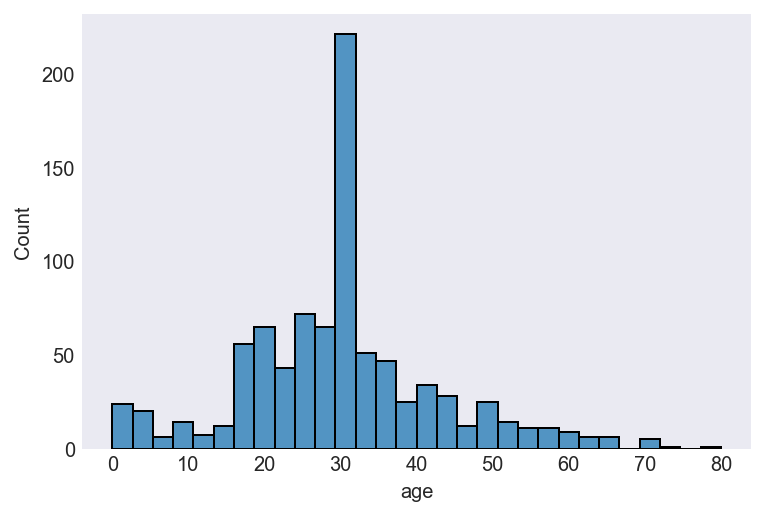

In [24]:
#결측값이 없고, 잘 되었는지 확인해봅니다.
print(t_clean['age'].isnull().sum())
sns.histplot(x=t_clean['age'])


    <5> 다음은 sibsp 과 parch 입니다.
    sibsp 는 sibilings/spouses 의 약자로 형제/자매 그리고 배우자를 의미합니다
    parch 는 parents / children 의 약자로 부모/자식 을 의미합니다. 
    즉 두 열은 '가족관계'를 의미한다고 파악됩니다.
    그렇다면 sibsp 과 parch 를 합친다면
    "탑승자의 가족 총 인원수" 를 출력할 수 있습니다.
    * 더하기전에 중요한 점은, 1인 가족도 있다는 점 입니다. 
    다른 가족관계 탑승객이 없을 시 요소값이 0 혹은 null이 되지 않도록 1을 더해줍니다

In [25]:
t_clean['family'] = t_clean['sibsp'] + t_clean['parch'] + 1
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone,family
0,0,3,male,22,1,0,7.2500,S,man,True,NaN,Southampton,False,2
1,1,1,female,38,1,0,71.2833,C,woman,False,C,Cherbourg,False,2
2,1,3,female,26,0,0,7.9250,S,woman,False,NaN,Southampton,True,1
3,1,1,female,35,1,0,53.1000,S,woman,False,C,Southampton,False,2
4,0,3,male,35,0,0,8.0500,S,man,True,NaN,Southampton,True,1


    여기서 볼 수 있드시, family 의 요소값이 1일 경우엔 alone 열의 값이 True인 것을 확인 할 수 있습니다.
    따라서 alone의 값 (True) 값은 family의 값 (1)에서 추출해 낼 수 있다고 판단이 가능합니다. 
    따라서 alone의 열을 제거합니다

In [26]:
t_clean.drop('alone',axis=1,inplace=True)
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,family
0,0,3,male,22,1,0,7.2500,S,man,True,NaN,Southampton,2
1,1,1,female,38,1,0,71.2833,C,woman,False,C,Cherbourg,2
2,1,3,female,26,0,0,7.9250,S,woman,False,NaN,Southampton,1
3,1,1,female,35,1,0,53.1000,S,woman,False,C,Southampton,2
4,0,3,male,35,0,0,8.0500,S,man,True,NaN,Southampton,1


    다시 분석하기 앞서, 상관관계를 파악합니다

In [27]:
t_clean.corr()
#상관관계는 int/float의 형태로 분석이 가능하기 때문에, 다른 열의 요소값들도 int/float형식으로 바꾸어줍니다.

,survived,pclass,age,sibsp,parch,fare,adult_male,family
survived,1.000000,-0.338481,-0.070649,-0.035322,0.081629,0.257307,-0.557080,0.016639
pclass,-0.338481,1.000000,-0.329822,0.083081,0.018443,-0.549500,0.094035,0.065997
age,-0.070649,-0.329822,1.000000,-0.232201,-0.180581,0.090782,0.254152,-0.248917
sibsp,-0.035322,0.083081,-0.232201,1.000000,0.414838,0.159651,-0.253586,0.890712
parch,0.081629,0.018443,-0.180581,0.414838,1.000000,0.216225,-0.349943,0.783111
fare,0.257307,-0.549500,0.090782,0.159651,0.216225,1.000000,-0.182024,0.217138
adult_male,-0.557080,0.094035,0.254152,-0.253586,-0.349943,-0.182024,1.000000,-0.348143
family,0.016639,0.065997,-0.248917,0.890712,0.783111,0.217138,-0.348143,1.000000


    <6> 다음은 embarked 입니다. *fare는 상관계수 파악후..!
    embarked와 가장 비슷한 embark_town을 나란히 두고 보겠습니다
   

In [28]:
t_clean[['embarked','embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


    확인해보면, embark_town의 앞글자가 embarked의 요소가 된 것 처럼 보입니다.
    우선 결측값이 있는지 확인해보겠습니다.

In [29]:
print(t_clean[['embarked','embark_town']].isnull().sum())
# 요소값이 있는 것으로 확인됩니다.

embarked       2
embark_town    2
dtype: int64


In [30]:
#embarked 와 embark_town의 요소값은 다음과 같습니다.
print(t_clean['embarked'].unique())
print(t_clean['embark_town'].unique())

# 빈 두가지의 요소는 같은 값인 S 와 Southampton 로 임의로 지정해둡니다.
t_clean['embarked'] = t_clean['embarked'].fillna('S')
t_clean['embark_town'] = t_clean['embark_town'].fillna('Southampton')

['S' 'C' 'Q' nan]
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [31]:
#결측값이 모두 채워졌는지 확인합니다.
print(t_clean[['embarked','embark_town']].isnull().sum())

embarked       0
embark_town    0
dtype: int64


    결측값이 모두 채워진 상태에서 비교를 해보자면, 
    embark_town의 앞글자가 embarked의 요소와 동일하다는 것을 가정하에,
    두 열이 같은지 비교합니다.

In [32]:
# 새로운 Title열을 생성해서 embark_town의 앞자리만 가져옵니다. 
# Title열과 embarked 열과 동일하다면, 가정이 맞음을 인지하고 Title과 embark_town을 삭제합니다.
t_clean['Title'] = [x[0] for x in t_clean['embark_town']]

In [33]:
print(t_clean[['embarked','embark_town','Title']].head())
t_clean['embarked'].equals(t_clean['Title'])

# True값이 반환되었으니 embarked 요소를 int 1,2,3으로 바꾸고,
# Title과 embark_town을 삭제합니다.
t_clean['embarked'] = t_clean['embarked'].replace({'S':1,'C':2,'Q':3})

  embarked  embark_town Title
0        S  Southampton     S
1        C    Cherbourg     C
2        S  Southampton     S
3        S  Southampton     S
4        S  Southampton     S


In [34]:
t_clean.drop(['Title','embark_town'],axis=1,inplace=True)
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,family
0,0,3,male,22,1,0,7.2500,1,man,True,NaN,2
1,1,1,female,38,1,0,71.2833,2,woman,False,C,2
2,1,3,female,26,0,0,7.9250,1,woman,False,NaN,1
3,1,1,female,35,1,0,53.1000,1,woman,False,C,2
4,0,3,male,35,0,0,8.0500,1,man,True,NaN,1


    앞서 상관관계를 분석하기 위해선 모든 요소는 int/float (숫자)형식을 따라야 합니다.
    따라서 sex,who,adult_male,deck을 int/float 형식으로 전환합니다.

In [35]:
#sex의 요소값
print(t_clean['sex'].unique())
#요소값 변화
t_clean['sex'] = t_clean['sex'].replace({'male':1,'female':0})

['male' 'female']


In [36]:
#who의 요소값
print(t_clean['who'].unique())
#요소값 변화
t_clean['who'] = t_clean['who'].replace({'man':1,'woman':0,'child':2})

['man' 'woman' 'child']


In [37]:
#adult_male 요소값
print(t_clean['adult_male'].unique())
#요소값 변화
t_clean['adult_male'] = t_clean['adult_male'].replace({True:1,False:0})

[ True False]


    deck 열은 남다르게 결측값을 많이 가지고 있습니다.
    우선 결측값부터 확인합니다

In [38]:
print(t_clean['deck'].size) #series의 length 구하는 함수
# dataframe 의 총 행의 개수는 891.  deck의 요소도 891개.

print(t_clean['deck'].isnull().sum())
#약 688 개의 결측값을 갖습니다.

print(t_clean['deck'].value_counts())
# deck의 열을보면, A~G 까지는 deck의 의미가 있고, 688개의 결측값이 있는 것을 확인할 수 있습니다.
# 그럼 deck의 의미는 무엇일까 짐작해보면, 객실의 종류임을 알 수 있습니다.
# 탑승객의 688명의 사용한 객실은 알 수 없으며 타 객실의 위치는 대략 확인할 수 있습니다.
# 따라서 688이라는 많은 수치이긴 하지만, 알수 없다는 Unknown의 약자 'U' 로 채워줍니다

# 사실 891개 중 688개를 모두 임의 지정하면 통계의 의미가 없지만..
t_clean['deck'] = t_clean['deck'].fillna('U')

891
688
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


0
U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64


<AxesSubplot:xlabel='deck', ylabel='Count'>

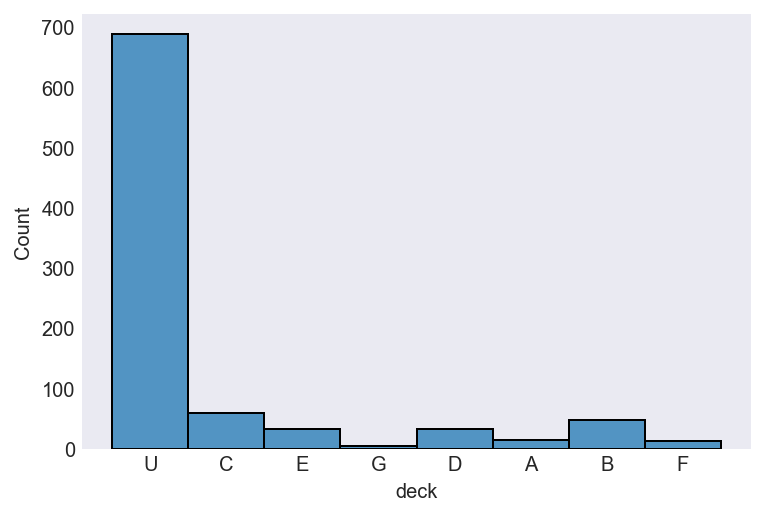

In [39]:
#결측값을 확인해봅니다.
print(t_clean['deck'].isnull().sum())

#요소값을 추출합니다.
print(t_clean['deck'].value_counts())
#U class가 압도적으로 많아 의미가 없어보입니다.

sns.histplot(x=t_clean['deck'])

<AxesSubplot:xlabel='deck', ylabel='survived'>

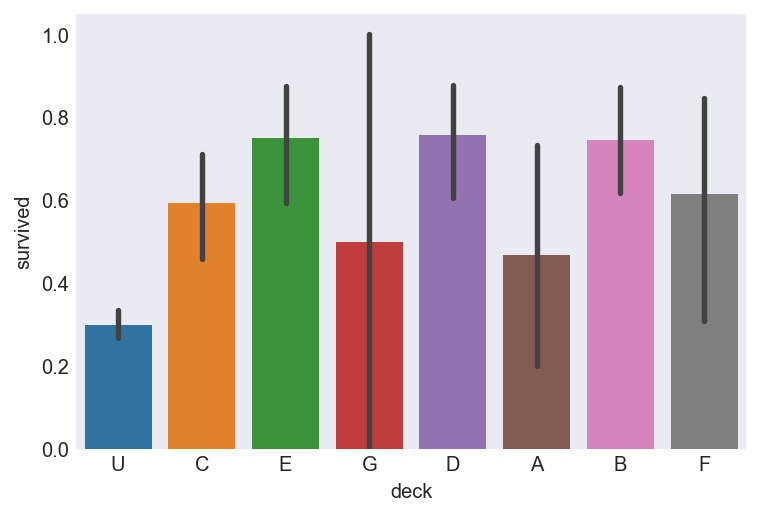

In [40]:
sns.barplot(x=t_clean['deck'],y=t_clean['survived'])
# x축을 deck, Y축을 survived


<AxesSubplot:xlabel='deck', ylabel='fare'>

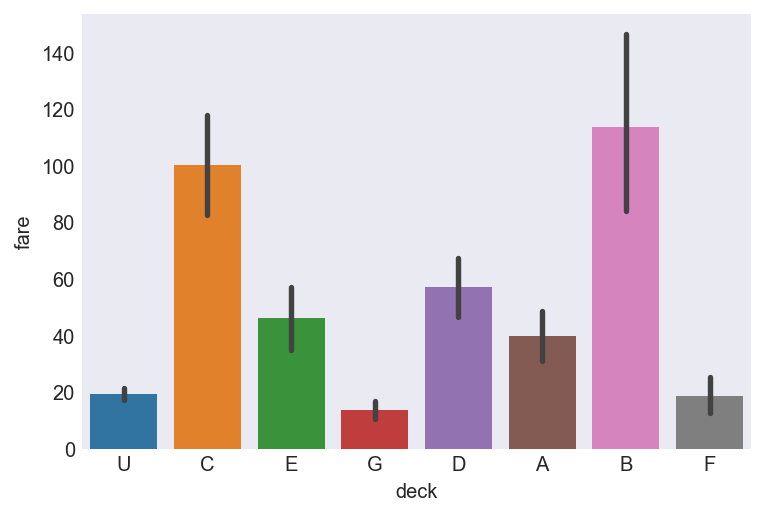

In [41]:
sns.barplot(x=t_clean['deck'],y=t_clean['fare'])

<AxesSubplot:xlabel='deck', ylabel='pclass'>

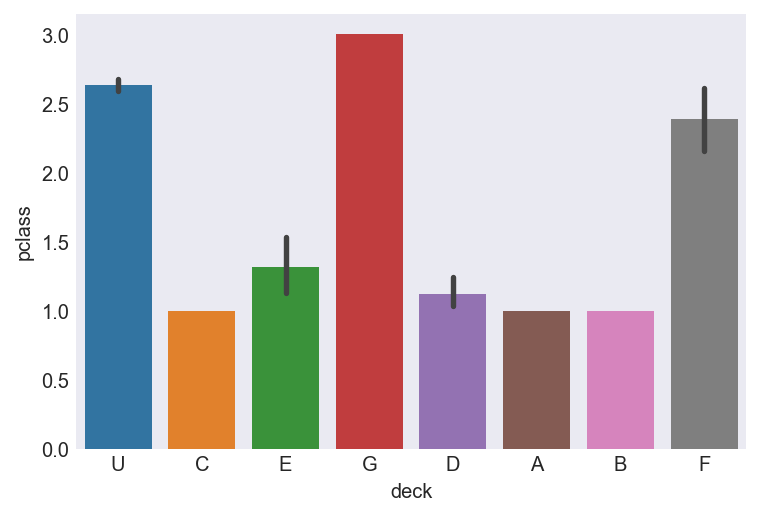

In [42]:
sns.barplot(x=t_clean['deck'],y=t_clean['pclass'])

<AxesSubplot:xlabel='pclass', ylabel='survived'>

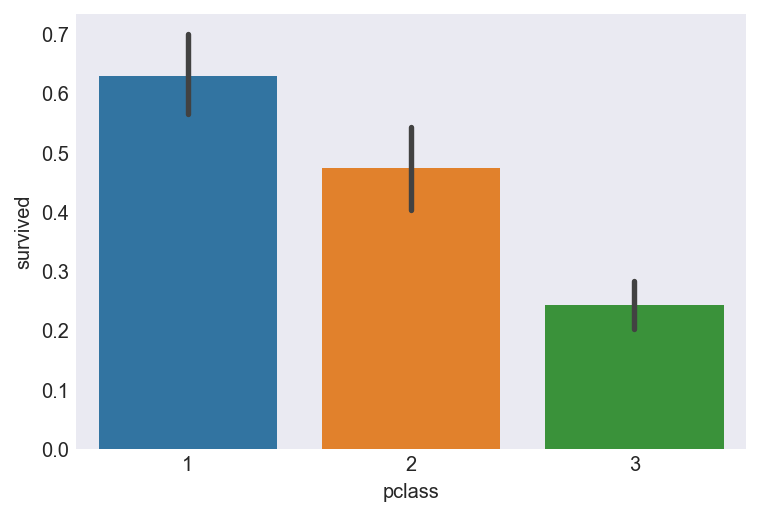

In [43]:
sns.barplot(x=t_clean['pclass'],y=t_clean['survived'])

    하지만, x축을 deck, y축을 survived로 놓았을때,
    U class 에 있던 688명의 생존확률은 다른 deck class에 비해 떨어진다는 것을 확인 할 수 있습니다.
    
   
    
    또한 y축을 fare로 놓았을때
    C와 B class에 있던 사람들은 더 높은 값을 지불했다고 볼 수 있습니다.
    
    따라서 y축을 pclass (1 - First) 로 놓았을때
    A,B,C 는 First class로 추출됩니다.
    
    이를 비롯하여 해석해보면,
    deck A,B,C는 pclass의 First, 1등석에 포함되어 있으며,
    B와 C는 높은 fare를 지불했다고 볼 수 있습니다.
    A는 1등석임에도 불구하고 fare가 낮고, 요소값도 적은것을 미루어보아 
    titanic 관계자가 머무르는 곳이라고 생각됩니다.
    
    D,E,F는 1~2.5 pclass에 있음을 보여 A,B,C 와는 다르게
    2등석이라고 볼 수 있습니다..만
    D,E,F는 fare와 pclass의 반비례를 보이기 때문에,
    2등석 내에도 차등석이 있음을 확인할 수 있습니다.
    따라 생존 확률도 1등석과 가까운 D,E가 B,C와 같이 높고, F도 2등석인 만큼 생존확률을 보여주고 있습니다.
    
    G는 pclass 가 3임으로 3등석에 위치한다고 볼 수 있고,
    이는 fare에서 가장 적은 값을 지불하고 탑승한 것으로 볼 수 있습니다. 
    따라 G deck 생존확률이 낮은것을 확인할 수 있습니다.
    이는 U 의 대부분이 G에 속해있음을 가정할 수 있다고 봅니다..(하지만 결측값이 너무 큼 ㅜ)




    다른 열들의 요소 값들을 (True/False = 1,0) 1,2,3 으로 변환했기 때문에,
    deck도 1,2,3으로 변환합니다.
    위의 내용을 참고하여
    A,B,C = 1
    D,E,F = 2
    G, U = 3
    으로 변환합니다.
    (U class의 요소값이 매우 높기 떄문에 큰 의미는 못가질 것 같습니다..만 해보는게 좋겠죠)

In [44]:
t_clean['deck'] = t_clean['deck'].replace({'A':1,'B':1,'C':1,'D':2,'E':2,'F':2,'G':3,'U':3})
t_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,family
0,0,3,1,22,1,0,7.2500,1,1,1,3,2
1,1,1,0,38,1,0,71.2833,2,0,0,1,2
2,1,3,0,26,0,0,7.9250,1,0,0,3,1
3,1,1,0,35,1,0,53.1000,1,0,0,1,2
4,0,3,1,35,0,0,8.0500,1,1,1,3,1


    상관계수를 확인합니다

In [45]:
t_clean.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,family
survived,1.000000,-0.338481,-0.543351,-0.070649,-0.035322,0.081629,0.257307,0.106811,-0.325753,-0.557080,-0.287263,0.016639
pclass,-0.338481,1.000000,0.131900,-0.329822,0.083081,0.018443,-0.549500,0.045702,0.196793,0.094035,0.733365,0.065997
sex,-0.543351,0.131900,1.000000,0.084241,-0.114631,-0.245489,-0.182333,-0.116569,0.639773,0.908578,0.116838,-0.200988
age,-0.070649,-0.329822,0.084241,1.000000,-0.232201,-0.180581,0.090782,0.010020,-0.356043,0.254152,-0.233229,-0.248917
sibsp,-0.035322,0.083081,-0.114631,-0.232201,1.000000,0.414838,0.159651,-0.059961,0.136003,-0.253586,0.032149,0.890712
parch,0.081629,0.018443,-0.245489,-0.180581,0.414838,1.000000,0.216225,-0.078665,0.055682,-0.349943,-0.037152,0.783111
fare,0.257307,-0.549500,-0.182333,0.090782,0.159651,0.216225,1.000000,0.062142,-0.146290,-0.182024,-0.541559,0.217138
embarked,0.106811,0.045702,-0.116569,0.010020,-0.059961,-0.078665,0.062142,1.000000,-0.101298,-0.108547,-0.038293,-0.080281
who,-0.325753,0.196793,0.639773,-0.356043,0.136003,0.055682,-0.146290,-0.101298,1.000000,0.437532,0.150665,0.120771
adult_male,-0.557080,0.094035,0.908578,0.254152,-0.253586,-0.349943,-0.182024,-0.108547,0.437532,1.000000,0.099927,-0.348143


<AxesSubplot:>

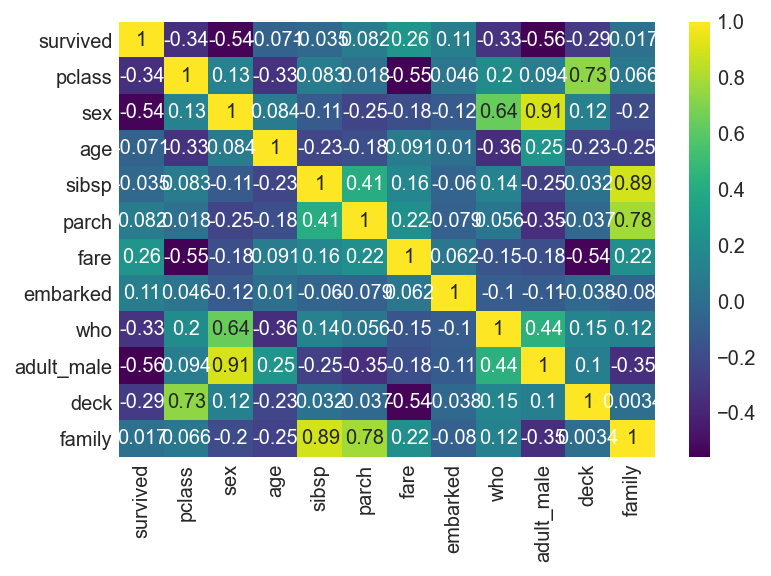

In [46]:
sns.heatmap(t_clean.corr(), annot = True, cmap = 'viridis')

    따라서 'who' 열은 이후 'age' 와 'adult_male' 과 함께 비교하는 것이 조금더 옳다 생각됩니다.
    라고 했지만, 상관계수 히트맵을 보면 who값은 age보단 sex열과
    sex열은 who와 adult_male과 가장 관련이 깊다는 것을 볼 수 있습니다.

In [ ]:
#여기까지.. 현재시각 03:21 졸려요